#Libraries Import & Google Drive Mount

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Project Object Detection

/content/gdrive/MyDrive/Colab Notebooks/Project Object Detection


#Data Preparation

In [6]:
train_path = '/content/gdrive/MyDrive/Colab Notebooks/Project Object Detection/train'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/Project Object Detection/test'

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150,150),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
test_set = train_datagen.flow_from_directory(test_path,
                                             target_size = (150,150),
                                             class_mode = 'categorical',
                                             batch_size = 32)

Found 1306 images belonging to 5 classes.
Found 299 images belonging to 5 classes.


#Data Modelling

In [8]:
#create model
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
train = model.fit_generator(training_set,
                            epochs = 50,
                            validation_data = test_set)
model.save_weights('model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
18/41 [============>.................] - ETA: 1:18 - loss: 1.7220 - accuracy: 0.2333

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/41 [==============================] - 204s 5s/step - loss: 1.6452 - accuracy: 0.2588 - val_loss: 1.5683 - val_accuracy: 0.2876
Epoch 2/50
41/41 [==============================] - 12s 287ms/step - loss: 1.5278 - accuracy: 0.3262 - val_loss: 1.4447 - val_accuracy: 0.4247
Epoch 3/50
41/41 [==============================] - 12s 296ms/step - loss: 1.4341 - accuracy: 0.3844 - val_loss: 1.3465 - val_accuracy: 0.4247
Epoch 4/50
41/41 [==============================] - 11s 266ms/step - loss: 1.3421 - accuracy: 0.4495 - val_loss: 1.1693 - val_accuracy: 0.5953
Epoch 5/50
41/41 [==============================] - 11s 267ms/step - loss: 1.3139 - accuracy: 0.4479 - val_loss: 1.2956 - val_accuracy: 0.5251
Epoch 6/50
41/41 [==============================] - 14s 347ms/step - loss: 1.2742 - accuracy: 0.4778 - val_loss: 1.1439 - val_accuracy: 0.5886
Epoch 7/50
41/41 [==============================] - 12s 287ms/step - loss: 1.2079 - accuracy: 0.5230 - val_loss: 1.1923 - val_accuracy: 0.5920
Epoch 8/50
4

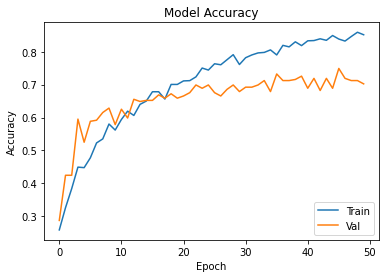

In [11]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

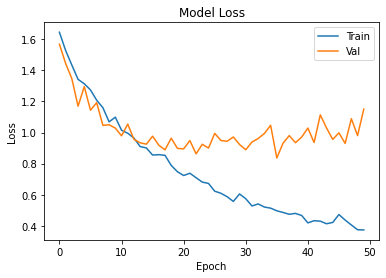

In [12]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

#Model Checking

In [13]:
#checking
from google.colab import files
upload = files.upload()

Saving 6ff5a9fd7631928927faf358f92fb054.jpg to 6ff5a9fd7631928927faf358f92fb054 (1).jpg


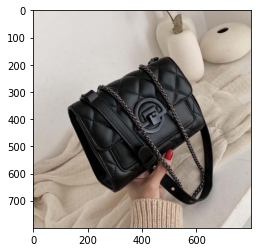

In [18]:
new_image = plt.imread('6ff5a9fd7631928927faf358f92fb054.jpg')
plt.imshow(new_image)

In [19]:
resized_image = resize(plt.imread('6ff5a9fd7631928927faf358f92fb054.jpg'), (150,150))
prediction = model.predict(np.array([resized_image]))
prediction

array([[6.7228094e-02, 7.3140126e-01, 2.0411486e-02, 1.8026081e-01,
        6.9839257e-04]], dtype=float32)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

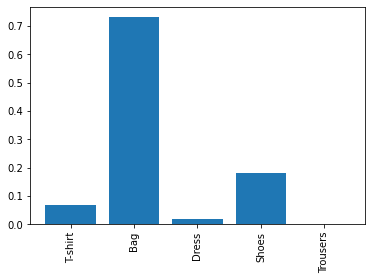

In [20]:
x_label = ['T-shirt', 'Bag', 'Dress', 'Shoes', 'Trousers']
y_label = prediction[0]

plt.bar(x_label, height = y_label)
plt.xticks(rotation=90)

#Model Deploy

In [17]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 4.4 MB/s 
     |████████████████████████████████| 181 kB 71.0 MB/s 
     |████████████████████████████████| 4.3 MB 42.2 MB/s 
     |████████████████████████████████| 232 kB 5.7 MB/s 
     |████████████████████████████████| 111 kB 51.7 MB/s 
     |████████████████████████████████| 78 kB 9.3 MB/s 
     |████████████████████████████████| 164 kB 73.7 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 133 kB 75.5 MB/s 
     |████████████████████████████████| 793 kB 51.7 MB/s 
     |████████████████████████████████| 428 kB 72.1 MB/s 
     |████████████████████████████████| 132 kB 68.3 MB/s 
     |████████████████████████████████| 381 kB 76.3 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c0d0804528df

In [21]:
%%writefile app.py
#^ to write/rewrite app.py everytime this cell runs

#importing libraries
import streamlit as st
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

model = tf.keras.models.load_model('model.h5')

st.write("""#Fashion Picture Prediction""")
st.write('This is a image classification web app to predict fashion image')

file = st.file_uploader('Please upload an image file', type = ['jpg','png'])

classify = st.button('Classify Picture')
if classify:
  if file is None:
    st.text('Please upload an image file')
  else:
    image = Image.open(file)
    st.image(image, use_column_width = True)
    prediction = model.predict(np.array(cv2.resize(image, dsize = (150,150)))))
    x_label = ['T-shirt', 'Bag', 'Dress', 'Shoes', 'Trousers']
    y_label = prediction[0]

    fgr = plt.figure(figsize=(10, 6))
    ax = fgr.add_subplot()
    plt.bar(x_label, height = y_label)
    plt.xticks(rotation=90)
    st.pyplot(fig) 

Overwriting app.py


In [34]:
#running to local tunnel
!streamlit run app.py & npx localtunnel --port 8501

2022-06-28 08:12:18.805 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.278s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.190.171.116:8501

  Stopping...
^C
